[View in Colaboratory](https://colab.research.google.com/github/papadarth/PyTorch-TimeSeries/blob/master/TimeSeriesPrediction1.ipynb)

# Import & Preperation


In [17]:
## starting with pytorch in google // lets play

# http://pytorch.org/
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
print("pyTorch ready")
  
## install ready  
import torch

pyTorch ready


# 2nd order classification

A simple 2nd order classification problem is shown: 4 classes defined by combinations of +1 or -1 are trained using an one-layer regression model and with a two-layer dense model.

-----------------
Linear Regression Model
-----------------

0
0 : 4.014406204223633
20 : 3.477400302886963
40 : 3.0071418285369873
60 : 3.0116968154907227
80 : 2.668760061264038


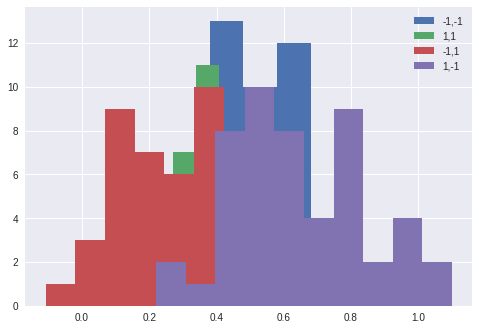

1
0 : 2.5906858444213867
20 : 2.1312801837921143
40 : 1.9545447826385498
60 : 1.8627409934997559
80 : 1.6648756265640259


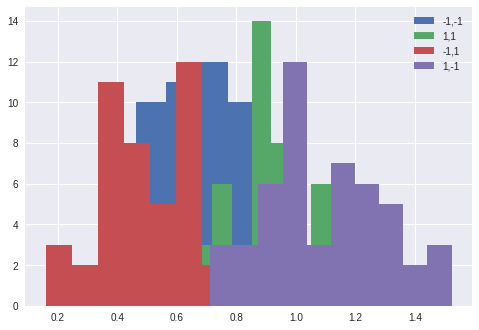

2
0 : 1.6321775913238525
20 : 1.4282870292663574
40 : 1.4495651721954346
60 : 1.4090003967285156
80 : 1.4116069078445435


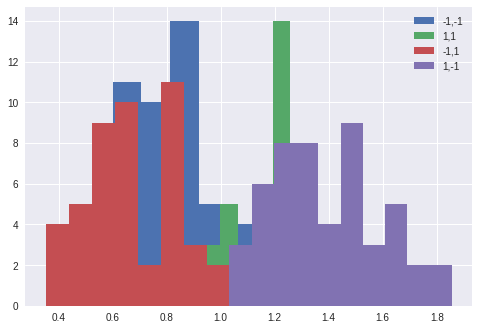

3
0 : 1.349774956703186
20 : 1.3017077445983887
40 : 1.30255126953125
60 : 1.2055015563964844
80 : 1.1585255861282349


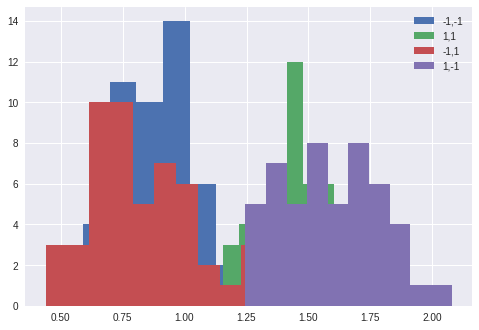

4
0 : 1.1198487281799316
20 : 1.1229573488235474
40 : 1.1186892986297607
60 : 1.1095715761184692
80 : 1.1651978492736816


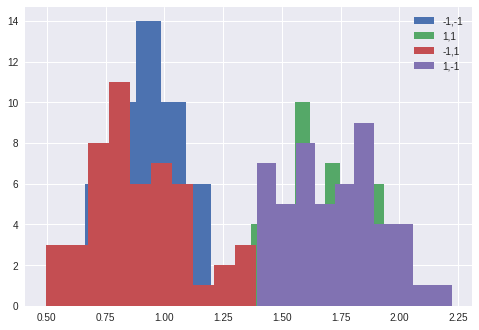

5
0 : 1.0951274633407593
20 : 1.1121338605880737
40 : 1.1061174869537354
60 : 1.083013653755188
80 : 1.0602073669433594


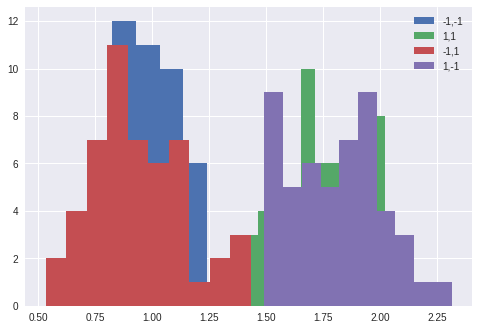

6
0 : 1.0587886571884155
20 : 1.0800583362579346
40 : 1.0803847312927246
60 : 1.0819611549377441
80 : 1.0362261533737183


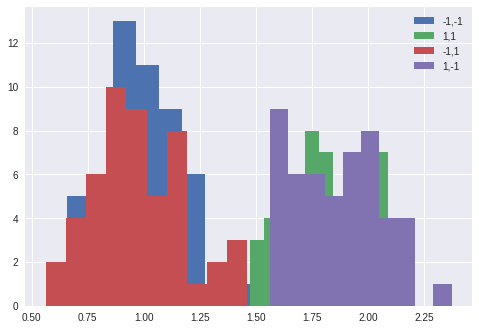

7
0 : 1.0107429027557373
20 : 0.995924711227417
40 : 1.0939936637878418
60 : 1.0660744905471802
80 : 1.0695254802703857


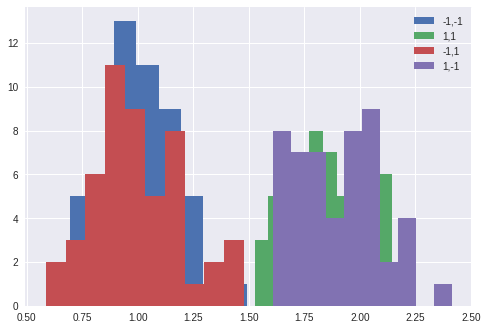

8
0 : 1.0290526151657104
20 : 1.062842607498169
40 : 1.0470786094665527
60 : 1.076297640800476
80 : 1.056357741355896


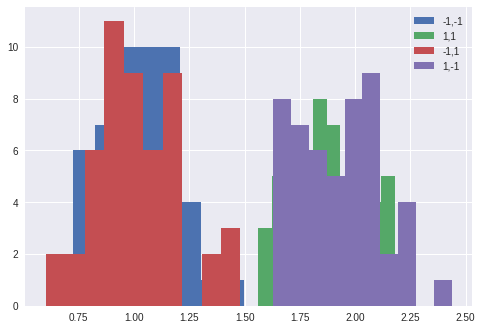

9
0 : 1.0314319133758545
20 : 1.0466516017913818
40 : 1.023927092552185
60 : 1.019575834274292
80 : 1.0537729263305664


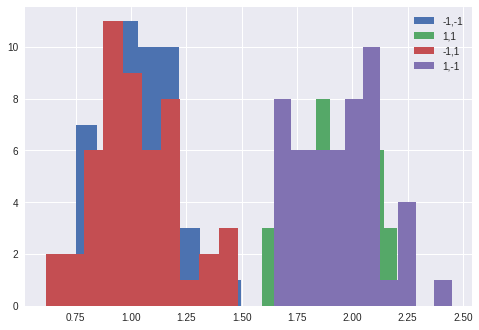

-----------------
Dense Layer Model
-----------------

0
0 : 3.9997479915618896
20 : 2.055619955062866
40 : 1.2284924983978271
60 : 0.867434024810791
80 : 0.7298271656036377


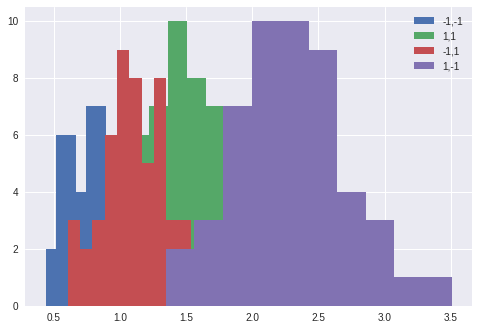

1
0 : 0.6851357817649841
20 : 0.6387619972229004
40 : 0.5760794281959534
60 : 0.5185351967811584
80 : 0.4604140818119049


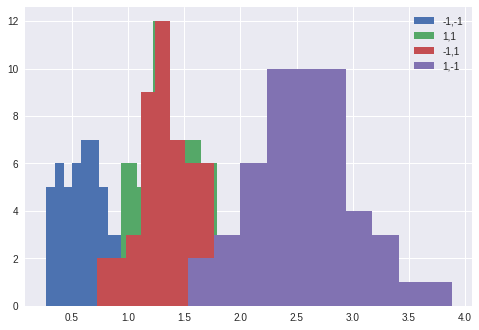

2
0 : 0.43446484208106995
20 : 0.4198188781738281
40 : 0.40158572793006897
60 : 0.3546009361743927
80 : 0.3210653066635132


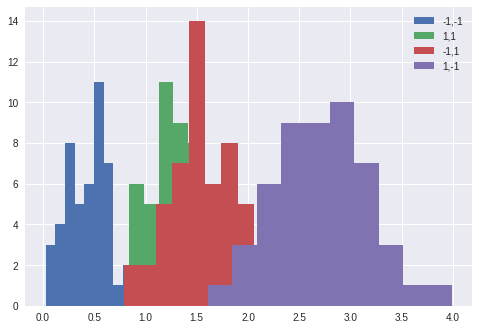

3
0 : 0.26733046770095825
20 : 0.35601693391799927
40 : 0.2689654529094696
60 : 0.24674086272716522
80 : 0.23966388404369354


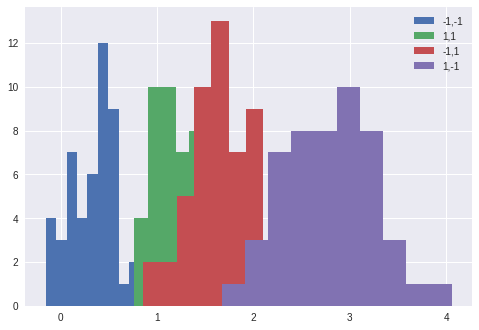

4
0 : 0.21736937761306763
20 : 0.23957686126232147
40 : 0.1998003125190735
60 : 0.24485410749912262
80 : 0.2567918598651886


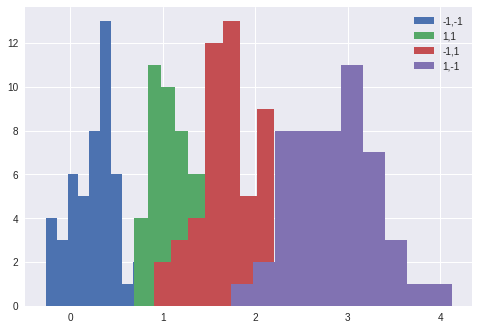

5
0 : 0.20852074027061462
20 : 0.18301093578338623
40 : 0.2007829248905182
60 : 0.17899906635284424
80 : 0.2244393229484558


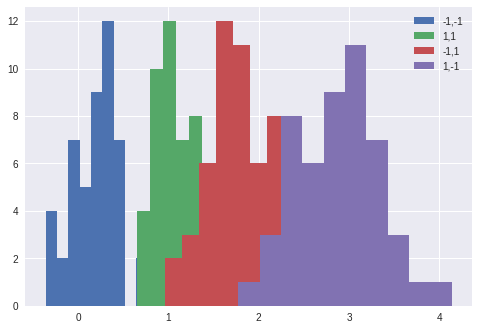

6
0 : 0.24361781775951385
20 : 0.19718047976493835
40 : 0.20952531695365906
60 : 0.20957796275615692
80 : 0.15732228755950928


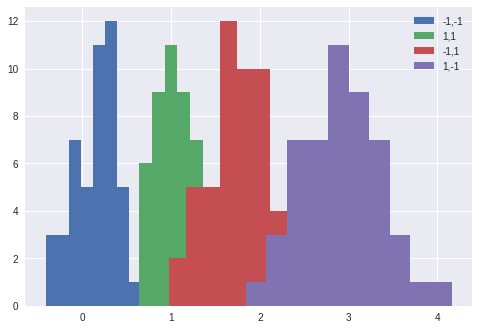

7
0 : 0.17814487218856812
20 : 0.18577133119106293
40 : 0.21879732608795166
60 : 0.19278568029403687
80 : 0.19725419580936432


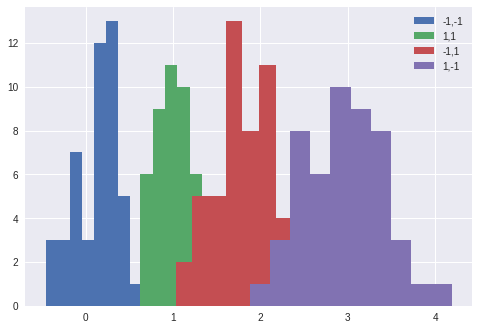

8
0 : 0.1662122905254364
20 : 0.21288850903511047
40 : 0.14688003063201904
60 : 0.1899794042110443
80 : 0.14970368146896362


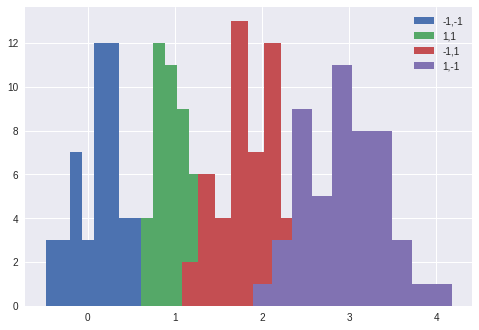

9
0 : 0.19465069472789764
20 : 0.1612611562013626
40 : 0.19140687584877014
60 : 0.16213791072368622
80 : 0.20505361258983612


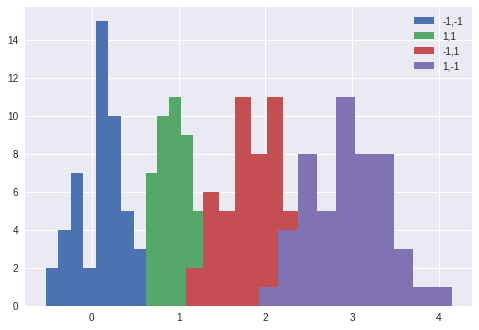

In [23]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

"""
learning pytorch
	testing less simple / 2 layer network

updates:
	0.2 : the pytorch structures Dataset and DataLoader is used
"""

__author__  = "Tobias Wagner"
__version__ = 0.2

import numpy as np
import pylab as plt
import torch
import torch.nn as nn
from torch.autograd import Variable


from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
## generate data ##
  
class MyDataGenerator(Dataset):
    """
    testing my first pytorch-Dataset implementing an
    data set generator at start-up
    """
    def __init__(self,train=True):
        """
        function where intial logic happens like reading, assiging parameter, generating a set of data
        """
        if train == True: 
          n   = 1000
        else:
            n = 200
        t   = 20
        a   = np.zeros((n,t),dtype=np.float32) 
        ## a
        a[::4,5] = -1
        a[::4,15] = -1
        ## b
        a[1::4,5] = 1
        a[1::4,15] = 1
        ## c
        a[2::4,5] = -1
        a[2::4,15] = 1
        ## d
        a[3::4,5] = 1
        a[3::4,15] = -1

        a   += np.random.randn(n,t)*.3
        b   = np.zeros((n), dtype=np.float32)
        b[1::4] = 1
        b[2::4] = 2
        b[3::4] = 3
        self.data   = a
        self.target = b
        """
        x_train = a[:800,:]
        y_train = b[:800]

        x_test  = a[800:,:]
        y_test  = a[800:]
        """
    def __getitem__(self,index):
        """
        retrun a tuple of data set and label of data set
            index is one or more realizations?
        """
        return (self.data[index,:],self.target[index])

    def __len__(self):
        """
        functions returns count of given realizations
        """
        return self.target.shape[0]

#dataset = MyDataGenerator
train_loader = DataLoader(MyDataGenerator(train=True),shuffle=True,batch_size=800)
test_loader = DataLoader(MyDataGenerator(train=False),batch_size=200)

class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, output_size)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

class DenseLayers(nn.Module):
    def __init__(self, input_size, hidden1_size, output_size):
        super(DenseLayers, self).__init__()
        self.linear1    = nn.Linear(input_size, hidden1_size)
        self.batch_n    = nn.BatchNorm1d(hidden1_size)
        self.relu       = nn.ReLU()
        self.linear2    = nn.Linear(hidden1_size, output_size)

    def forward(self, x):
        h   = self.relu(self.batch_n(self.linear1(x)))
        out   = self.linear2(h)
        return out
t = 20
input_size	= t
output_size	= 1
hidden1_size    = 100

for klm in range(2):
  if klm == 0:
    print('-----------------\nLinear Regression Model\n-----------------\n')
    model = LinearRegression(input_size, output_size)
  else:
    print('-----------------\nDense Layer Model\n-----------------\n')
    model = DenseLayers(input_size, hidden1_size, output_size)

  criterion	= nn.MSELoss()
  optimizer	= torch.optim.SGD(model.parameters(), lr=.001)
  rnd             = np.arange(0,800)

  for i in range(10):
      print(i)
      model.train()
      for epoch in range(100):
        for (inputs, targets) in train_loader:
          inputs = Variable(inputs)
          targets = Variable(targets)
          optimizer.zero_grad()
          outputs = model(inputs)
          loss = criterion(outputs, targets)
          loss.backward()
          optimizer.step()
        if epoch%20 == 0:
          print(epoch,':',loss.data[0])
      model.eval()
      for test_data,targets in test_loader:
        predicted = model(Variable(test_data)).data.numpy()
        plt.hist(predicted[::4])
        plt.hist(predicted[1::4])
        plt.hist(predicted[2::4])
        plt.hist(predicted[3::4])
        plt.legend(['-1,-1','1,1','-1,1','1,-1'])
        plt.show()

# Time series analysis as pattern classification

A model for time-series is defined, where one pattern will define 10 different classes. This pattern is i) not aligned (moving on time axis) and ii) is surronded by additional pattern not contriubting to the classification.
Testing models:
1. Linear
2. CNN: LeNet, AlexNet, GoogleNet
3. LSTM

